In [22]:
def generateHeader():
    header = []
    for i in range(1,26):
        header.append("y"+str(i))
        header.append("block"+str(i))
    header.append("biome")
    return header

In [33]:
import pandas as pd
import os
import numpy as np
dataPath = "./Data/"
headers = generateHeader()
filename_read = os.path.join(dataPath,"data4.csv")
df = pd.read_csv(filename_read, names = headers)
pd.get_dummies(df["biome"])

df

,y1,block1,y2,block2,y3,block3,y4,block4,y5,block5,...,block21,y22,block22,y23,block23,y24,block24,y25,block25,biome
0,68,2,68,2,71,18,69,2,69,2,...,2,68,2,69,2,69,2,69,2,18
1,69,2,69,2,69,2,70,2,70,2,...,2,69,2,70,2,70,2,70,2,18
2,68,2,69,2,69,2,69,2,69,2,...,2,69,2,69,2,69,2,69,2,18
3,68,2,68,2,68,2,68,2,68,2,...,32786,68,2,68,2,69,2,76,32786,18
4,69,2,67,2,67,2,68,2,68,2,...,2,66,2,68,4127,67,2,68,2,4
5,69,2,66,2,68,4127,68,4127,68,2,...,18,66,2,67,2,67,2,68,2,4
6,71,18,67,2,73,32786,67,2,68,2,...,2,69,2,69,2,69,2,68,2,4
7,68,2,68,2,69,2,69,2,69,2,...,2,69,2,69,2,69,2,69,2,18
8,69,2,69,2,70,2,70,2,70,2,...,2,70,2,70,2,70,2,70,2,18
9,70,2,70,2,70,2,70,2,70,2,...,2,70,2,71,2,71,2,71,2,18


0      2126
1      6353
2      4036
3      3886
4      2835
5      3284
6      1684
7      2107
11       71
12      374
13      280
16      666
17      948
18     1689
19      756
21      964
22      135
23      182
24      690
25       51
26       43
27     1182
28       95
29      208
32      211
33       42
34     1756
35     2788
36      899
129     137
131    1988
132     139
133      24
160      44
164     152
dtype: int64

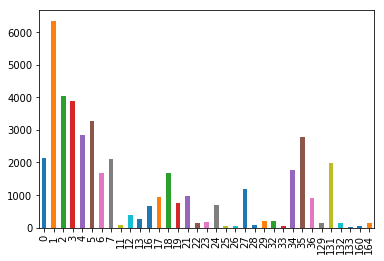

In [55]:
import matplotlib.pyplot as plt
biomes = pd.get_dummies(df['biome'])
plt.figure()

biomes.sum().plot(kind='bar')
biomes.sum()

(12,)

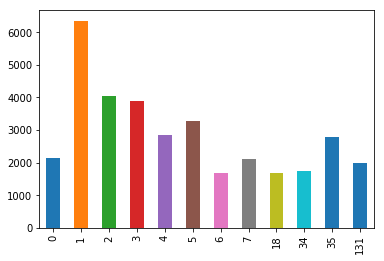

In [58]:
#getting biomes with rows more than a certain threshold
threshold = 1500
largeBs = [col for col,val in biomes.sum().iteritems() if val>threshold]
df1 = df[df['biome'].isin(largeBs)]
biomes = pd.get_dummies(df1["biome"])
biomes.sum().plot(kind='bar')
biomes.sum().shape

In [ ]:
#the blocks in different biomes


In [59]:
#getting 'threshold' of each and constructing new df
newDf = pd.DataFrame()
for biome in largeBs:
    tempDf = df[df.biome==biome]
    tempDf = tempDf.reindex(np.random.permutation(tempDf.index))
    tempDf = tempDf[0:threshold]
    newDf = pd.concat([newDf, tempDf])

newDf.reset_index(inplace=True, drop=True)
newDf

,y1,block1,y2,block2,y3,block3,y4,block4,y5,block5,...,block21,y22,block22,y23,block23,y24,block24,y25,block25,biome
0,62,9,62,9,62,9,62,9,62,9,...,9,62,9,62,9,62,9,62,9,0
1,62,9,62,9,62,9,62,9,62,9,...,9,62,9,62,9,62,9,62,9,0
2,62,9,62,9,62,9,62,9,62,9,...,9,62,9,62,9,62,9,62,9,0
3,63,0,63,0,63,0,63,0,63,0,...,0,63,0,63,0,63,0,63,0,0
4,63,0,63,0,63,0,63,0,63,0,...,0,63,0,63,0,63,0,63,0,0
5,62,9,62,9,62,9,62,9,62,9,...,9,62,9,62,9,62,9,62,9,0
6,63,0,63,0,63,0,63,0,63,0,...,0,63,0,63,0,63,0,63,0,0
7,62,9,62,9,62,9,62,9,62,9,...,9,62,9,62,9,62,9,62,9,0
8,63,0,63,0,63,0,63,0,63,0,...,0,63,0,63,0,63,0,63,0,0
9,63,0,63,0,63,0,63,0,63,0,...,0,63,0,63,0,63,0,63,0,0


In [60]:
path = './Data/'
filename_write = os.path.join(path, 'data_cleaned4.csv')
newDf.to_csv(filename_write, index = False)